In [1]:
#Environment Setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [5]:
#Data Read
file_path = '../input/house-prices-advanced-regression-techniques'
train=pd.read_csv(f'{file_path}/train.csv')
test= pd.read_csv(f'{file_path}/test.csv')

In [6]:
train = train.copy()


In [7]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [8]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [9]:
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [10]:
#copying sales priece
y=train['SalePrice'].copy()

In [11]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [12]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


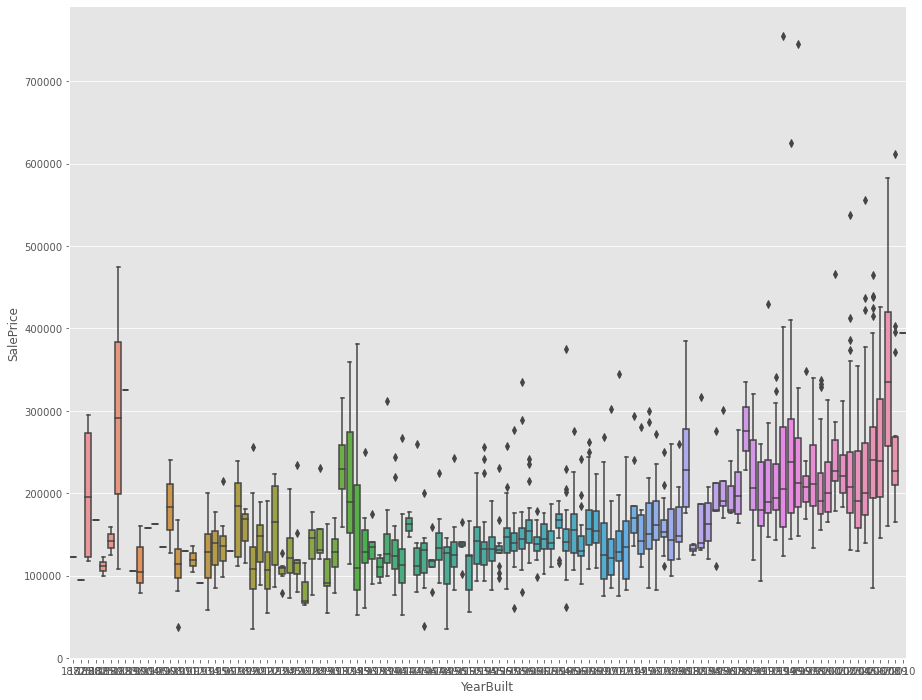

In [13]:
plt.figure(figsize=(15,12))
sns.boxplot(train.YearBuilt, train.SalePrice)

(0.0, 800000.0)

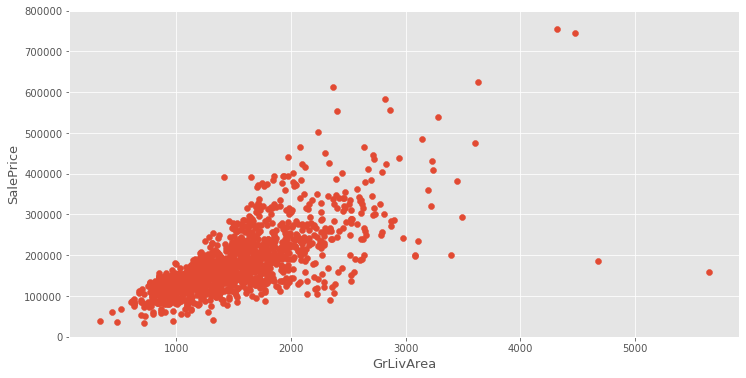

In [14]:
plt.figure(figsize=(12,6))
plt.scatter(x=train.GrLivArea, y=train.SalePrice)
plt.xlabel("GrLivArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)

In [15]:
#as per above plot we can see there are two outliers which can affect on out model,lets remove those outliers
train=train.drop(train.loc[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index,0)
train.reset_index(drop=True, inplace=True)

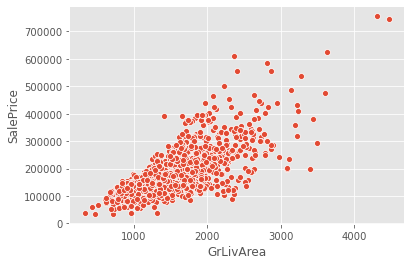

In [16]:
#lest we how its look after removing outliers
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train)

In [17]:
#Features engineering

In [18]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values

df = pd.concat((train, test)).reset_index(drop=True)


In [19]:
ntrain

1458

In [20]:
ntest

1459

In [21]:
y_train.shape

(1458,)

In [22]:
y_train

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [23]:
df.drop(['SalePrice'], axis=1, inplace=True)
print("df size is : {}".format(df.shape))

df size is : (2917, 79)


In [24]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2913,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2914,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2915,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [25]:
df1 = (df.isnull().sum() / len(df)) * 100
df1 = df1.drop(df1[df1 == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df1})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageYrBlt,5.450806
GarageQual,5.450806
GarageCond,5.450806


Text(0.5, 1.0, 'Percent missing data by feature')

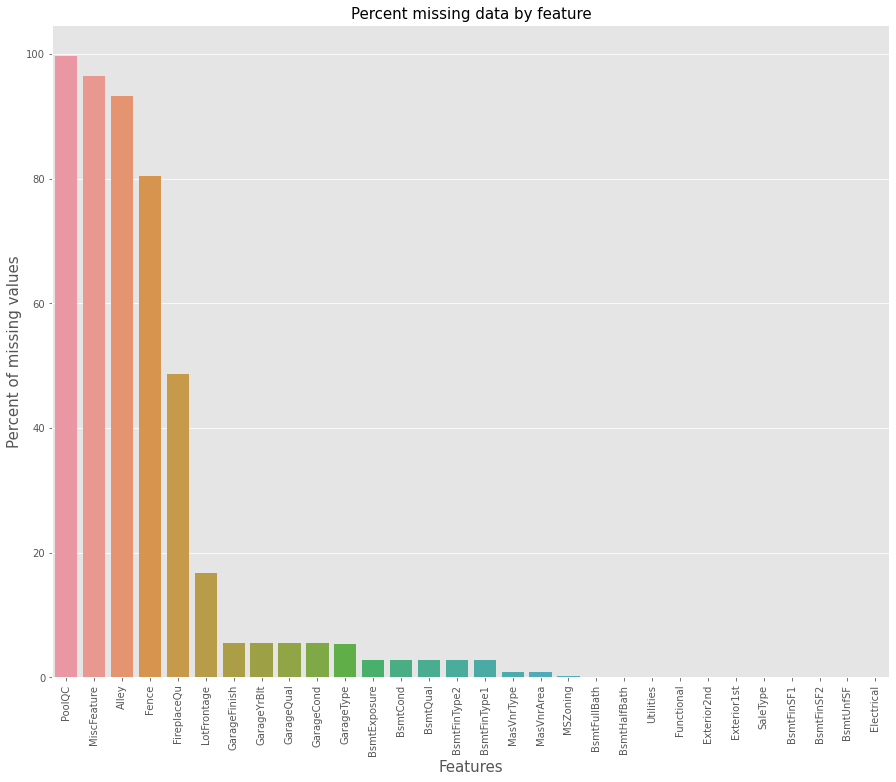

In [26]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=df1.index, y=df1)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [27]:
df1 = df.drop(['MiscFeature','MSZoning','LotFrontage','Street','Alley','LotShape','LandContour','Utilities','PoolQC','Fence'],axis = 1)
df1.head()

,MSSubClass,LotArea,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,8450,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,9600,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,11250,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,9550,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,14260,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,...,84,0,0,0,0,0,12,2008,WD,Normal


In [28]:
#to show number of Nulls in data
Nulls=df1.isnull().sum().sort_values(ascending=False)
percent=df1.isnull().sum()/df1.isnull().count().sort_values(ascending=False)
missing_data=pd.concat([Nulls,percent],axis=1,keys=['Nulls','percent'])
missing_data.head(30)

,Nulls,percent
FireplaceQu,1420,0.486802
GarageCond,159,0.054508
GarageYrBlt,159,0.054508
GarageFinish,159,0.054508
GarageQual,159,0.054508
GarageType,157,0.053822
BsmtExposure,82,0.028111
BsmtCond,82,0.028111
BsmtQual,81,0.027768
BsmtFinType2,80,0.027425


In [29]:
# New, we can drop missing data > 160 nulls
df1=df1.drop(missing_data[missing_data['Nulls']>160].index,1)

In [30]:
df1

,MSSubClass,LotArea,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,8450,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,9600,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,11250,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,9550,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,14260,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,160,1936,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,...,0,0,0,0,0,0,6,2006,WD,Normal
2913,160,1894,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,...,24,0,0,0,0,0,4,2006,WD,Abnorml
2914,20,20000,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,...,0,0,0,0,0,0,9,2006,WD,Abnorml
2915,85,10441,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,...,32,0,0,0,0,700,7,2006,WD,Normal


In [31]:
#to show number of Nulls in data
Nulls=df1.isnull().sum().sort_values(ascending=False)
percent=df1.isnull().sum()/df1.isnull().count().sort_values(ascending=False)
missing_data=pd.concat([Nulls,percent],axis=1,keys=['Nulls','percent'])
missing_data.head(30)

,Nulls,percent
GarageCond,159,0.054508
GarageYrBlt,159,0.054508
GarageFinish,159,0.054508
GarageQual,159,0.054508
GarageType,157,0.053822
BsmtExposure,82,0.028111
BsmtCond,82,0.028111
BsmtQual,81,0.027768
BsmtFinType2,80,0.027425
BsmtFinType1,79,0.027083


In [32]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df1[col] = df1[col].fillna(0)

In [33]:
df1["MasVnrType"] = df1["MasVnrType"].fillna("None")
df1["MasVnrArea"] = df1["MasVnrArea"].fillna(0)

In [34]:
df1["Functional"] = df1["Functional"].fillna("Typ")

In [35]:
df1['Electrical'] = df1['Electrical'].fillna(df1['Electrical'].mode()[0])

In [36]:
df1['KitchenQual'] =df1['KitchenQual'].fillna(df1['KitchenQual'].mode()[0])

In [37]:
df1['Exterior1st'] = df1['Exterior1st'].fillna(df1['Exterior1st'].mode()[0])
df1['Exterior2nd'] = df1['Exterior2nd'].fillna(df1['Exterior2nd'].mode()[0])

In [38]:
df1["GarageType"] = df1["GarageType"].fillna("None")

In [39]:
df1["GarageFinish"] = df1["GarageFinish"].fillna("None")

In [40]:
df1["GarageQual"] = df1["GarageQual"].fillna("None")

In [41]:
df1["GarageCond"] = df1["GarageCond"].fillna("None")

In [42]:
df1["GarageYrBlt"] = df1["GarageYrBlt"].fillna("None")

In [43]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df1[col] = df1[col].fillna('None')

In [44]:
for col in ('GarageArea', 'GarageCars'):
    df1[col] = df1[col].fillna(0)

In [45]:
df1['SaleType'] = df1['SaleType'].fillna(df1['SaleType'].mode()[0])

In [46]:
#Transforming some numerical variables that are really categorical

In [47]:
#MSSubClass=The building class
df1['MSSubClass'] = df1['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df1['OverallCond'] = df1['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df1['YrSold'] = df1['YrSold'].astype(str)
df1['MoSold'] = df1['MoSold'].astype(str)

In [48]:
#Check remaining missing values if any 
all_data_na = (df1.isnull().sum() / len(df1)) * 100
df2 = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :df2})
missing_data.head()

,Missing Ratio


In [49]:
df=df1.copy()

In [50]:
df

,MSSubClass,LotArea,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,8450,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,9600,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,11250,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,9550,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,14260,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,160,1936,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,...,0,0,0,0,0,0,6,2006,WD,Normal
2913,160,1894,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,...,24,0,0,0,0,0,4,2006,WD,Abnorml
2914,20,20000,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,...,0,0,0,0,0,0,9,2006,WD,Abnorml
2915,85,10441,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,...,32,0,0,0,0,700,7,2006,WD,Normal


In [51]:
df.columns

Index(['MSSubClass', 'LotArea', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold

In [52]:
from sklearn.preprocessing import LabelEncoder
cols = ('BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC','KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
         'PavedDrive', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

# shape        
print('Shape all_data: {}'.format(df.shape))

Shape all_data: (2917, 68)


In [53]:
# Adding total sqfootage feature 
df['TotalSF'] = df['TotalBsmtSF'] +df['1stFlrSF'] + df['2ndFlrSF']

In [54]:
df

,MSSubClass,LotArea,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,10,8450,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,...,0,0,0,0,0,4,2,WD,Normal,2566.0
1,5,9600,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,...,0,0,0,0,0,7,1,WD,Normal,2524.0
2,10,11250,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,...,0,0,0,0,0,11,2,WD,Normal,2706.0
3,11,9550,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,...,272,0,0,0,0,4,0,WD,Abnorml,2473.0
4,10,14260,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,...,0,0,0,0,0,3,2,WD,Normal,3343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,2,1936,Inside,0,MeadowV,Norm,Norm,Twnhs,2Story,4,...,0,0,0,0,0,8,0,WD,Normal,1638.0
2913,2,1894,Inside,0,MeadowV,Norm,Norm,TwnhsE,2Story,4,...,0,0,0,0,0,6,0,WD,Abnorml,1638.0
2914,5,20000,Inside,0,Mitchel,Norm,Norm,1Fam,1Story,5,...,0,0,0,0,0,11,0,WD,Abnorml,2448.0
2915,14,10441,Inside,0,Mitchel,Norm,Norm,1Fam,SFoyer,5,...,0,0,0,0,700,9,0,WD,Normal,1882.0


In [55]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics


In [56]:
numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [57]:
""""Box Cox Transformation of (highly) skewed features

We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x .

Note that setting  λ=0  is equivalent to log1p used above for the target variable.
"""

'"Box Cox Transformation of (highly) skewed features\n\nWe use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x .\n\nNote that setting  λ=0  is equivalent to log1p used above for the target variable.\n'

In [58]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    
    df[feat] = boxcox1p(df[feat], lam)

There are 51 skewed numerical features to Box Cox transform


In [59]:
#Getting dummy categorical features

In [60]:
df = pd.get_dummies(df)
print(df.shape)

(2917, 302)


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Columns: 302 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(51), uint8(251)
memory usage: 1.8 MB


In [62]:
df

,MSSubClass,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.885846,19.212182,0.000000,2.440268,1.820334,14.187527,14.187527,8.059126,1.194318,1.820334,...,0,0,0,1,0,0,0,0,1,0
1,2.055642,19.712205,0.000000,2.259674,2.440268,14.145138,14.145138,0.000000,1.540963,1.820334,...,0,0,0,1,0,0,0,0,1,0
2,2.885846,20.347241,0.000000,2.440268,1.820334,14.184404,14.185966,7.646538,1.194318,1.820334,...,0,0,0,1,0,0,0,0,1,0
3,3.011340,19.691553,0.000000,2.440268,1.820334,14.047529,14.135652,0.000000,1.540963,1.820334,...,0,0,0,1,1,0,0,0,0,0
4,2.885846,21.325160,0.000000,2.602594,1.820334,14.182841,14.182841,9.391827,1.194318,1.820334,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,1.194318,14.081426,0.000000,1.820334,2.259674,14.135652,14.135652,0.000000,1.540963,1.820334,...,0,0,0,1,0,0,0,0,1,0
2913,1.194318,14.013314,0.000000,1.820334,1.820334,14.135652,14.135652,0.000000,1.540963,1.820334,...,0,0,0,1,1,0,0,0,0,0
2914,2.055642,22.782058,0.000000,2.055642,2.259674,14.119786,14.176584,0.000000,1.540963,1.820334,...,0,0,0,1,1,0,0,0,0,0
2915,3.340760,20.046557,0.000000,2.055642,1.820334,14.170316,14.170316,0.000000,1.540963,1.820334,...,0,0,0,1,0,0,0,0,1,0


In [63]:
df = df.loc[:,~df.columns.duplicated()]

In [64]:
df.describe()

,MSSubClass,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,...,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000
mean,2.297544,19.488503,0.037853,2.252802,1.934998,14.137375,14.157992,3.201387,1.359429,1.723357,...,0.002743,0.081248,0.002400,0.865958,0.065135,0.004114,0.008228,0.015770,0.823449,0.083305
std,0.795282,1.968574,0.171073,0.274366,0.267917,0.048118,0.032941,4.112464,0.317436,0.267927,...,0.052306,0.273262,0.048937,0.340756,0.246807,0.064018,0.090348,0.124604,0.381354,0.276390
min,0.000000,12.878993,0.000000,0.730463,0.000000,13.977122,14.103852,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.055642,18.741179,0.000000,2.055642,1.820334,14.108639,14.127727,0.000000,1.194318,1.820334,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2.055642,19.650807,0.000000,2.259674,1.820334,14.140398,14.171884,0.000000,1.540963,1.820334,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.885846,20.456195,0.000000,2.440268,2.055642,14.184404,14.189087,7.659675,1.540963,1.820334,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.438110,35.391371,1.194318,2.885846,2.602594,14.198437,14.198437,13.496904,1.540963,1.820334,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
import pandas_profiling

In [66]:
# preparing profile report

profile_report = pandas_profiling.ProfileReport(df,minimal=True)
profile_report

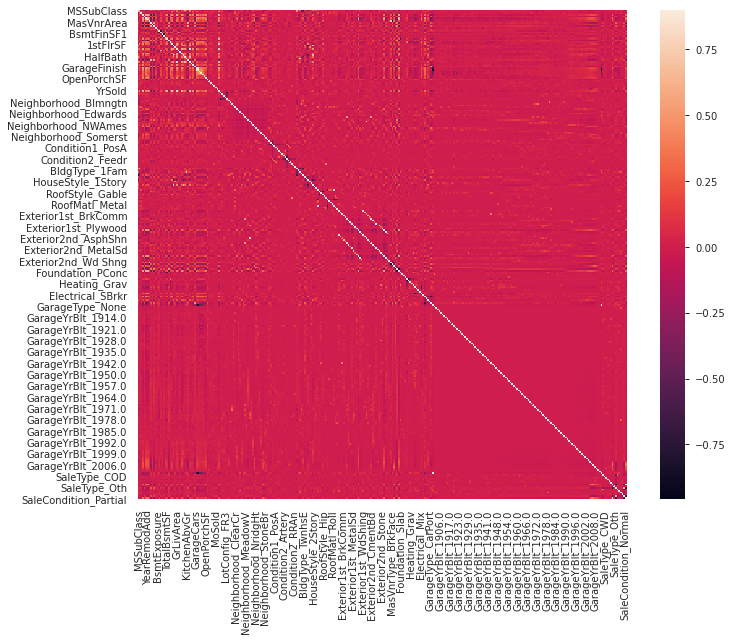

In [67]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [68]:
df.apply(lambda x: sum(x.isnull()),axis=0)

MSSubClass               0
LotArea                  0
LandSlope                0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 302, dtype: int64

In [69]:
#Plotting data 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [70]:
le = LabelEncoder()
for col in df.select_dtypes('object').columns:
    df[col] = le.fit_transform(df[col])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Columns: 302 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(51), uint8(251)
memory usage: 1.8 MB


In [72]:
from sklearn.model_selection import  train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

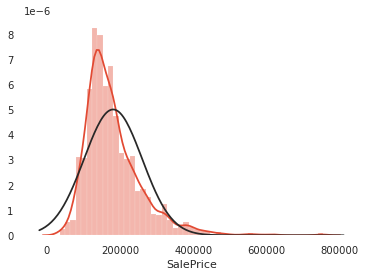

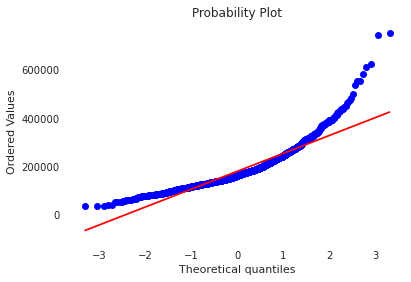

In [73]:
#histogram and normal probability plot
from scipy import stats

sns.distplot(train['SalePrice'],fit=stats.norm)
fig = plt.figure()
prob=stats.probplot(train['SalePrice'],plot=plt)
plt.show()

In [74]:
#data transformation
train['SalePrice']=np.log(train['SalePrice'])

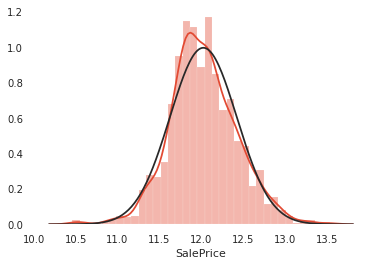

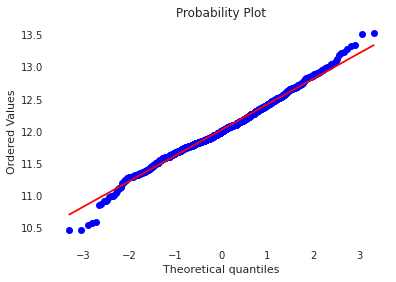

In [75]:
#transformed histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [76]:
y=train['SalePrice']

In [77]:
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1453    12.072541
1454    12.254863
1455    12.493130
1456    11.864462
1457    11.901583
Name: SalePrice, Length: 1458, dtype: float64

In [78]:
y_train = train.SalePrice.values

In [79]:
y_train

array([12.24769432, 12.10901093, 12.31716669, ..., 12.49312952,
       11.86446223, 11.90158345])

In [80]:
train = df[:ntrain]
test = df[ntrain:]

In [81]:
train

,MSSubClass,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.885846,19.212182,0.0,2.440268,1.820334,14.187527,14.187527,8.059126,1.194318,1.820334,...,0,0,0,1,0,0,0,0,1,0
1,2.055642,19.712205,0.0,2.259674,2.440268,14.145138,14.145138,0.000000,1.540963,1.820334,...,0,0,0,1,0,0,0,0,1,0
2,2.885846,20.347241,0.0,2.440268,1.820334,14.184404,14.185966,7.646538,1.194318,1.820334,...,0,0,0,1,0,0,0,0,1,0
3,3.011340,19.691553,0.0,2.440268,1.820334,14.047529,14.135652,0.000000,1.540963,1.820334,...,0,0,0,1,1,0,0,0,0,0
4,2.885846,21.325160,0.0,2.602594,1.820334,14.182841,14.182841,9.391827,1.194318,1.820334,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2.885846,18.960528,0.0,2.259674,1.820334,14.181278,14.182841,0.000000,1.540963,1.820334,...,0,0,0,1,0,0,0,0,1,0
1454,2.055642,20.994868,0.0,2.259674,2.055642,14.148295,14.164038,7.003881,1.540963,1.820334,...,0,0,0,1,0,0,0,0,1,0
1455,3.011340,19.476345,0.0,2.440268,2.602594,14.089451,14.192207,0.000000,0.000000,1.194318,...,0,0,0,1,0,0,0,0,1,0
1456,2.055642,19.760176,0.0,2.055642,2.055642,14.103852,14.176584,0.000000,1.540963,1.820334,...,0,0,0,1,0,0,0,0,1,0


In [82]:
test

,MSSubClass,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1458,2.055642,20.479373,0.000000,2.055642,2.055642,14.121376,14.121376,0.000000,1.540963,1.820334,...,0,0,0,1,0,0,0,0,1,0
1459,2.055642,21.327220,0.000000,2.259674,2.055642,14.116605,14.116605,6.808145,1.540963,1.820334,...,0,0,0,1,0,0,0,0,1,0
1460,2.885846,21.196905,0.000000,2.055642,1.820334,14.178149,14.179714,0.000000,1.540963,1.820334,...,0,0,0,1,0,0,0,0,1,0
1461,2.885846,19.865444,0.000000,2.259674,2.055642,14.179714,14.179714,3.858807,1.540963,1.820334,...,0,0,0,1,0,0,0,0,1,0
1462,0.000000,17.257255,0.000000,2.602594,1.820334,14.170316,14.170316,0.000000,1.194318,1.820334,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,1.194318,14.081426,0.000000,1.820334,2.259674,14.135652,14.135652,0.000000,1.540963,1.820334,...,0,0,0,1,0,0,0,0,1,0
2913,1.194318,14.013314,0.000000,1.820334,1.820334,14.135652,14.135652,0.000000,1.540963,1.820334,...,0,0,0,1,1,0,0,0,0,0
2914,2.055642,22.782058,0.000000,2.055642,2.259674,14.119786,14.176584,0.000000,1.540963,1.820334,...,0,0,0,1,1,0,0,0,0,0
2915,3.340760,20.046557,0.000000,2.055642,1.820334,14.170316,14.170316,0.000000,1.540963,1.820334,...,0,0,0,1,0,0,0,0,1,0


In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [84]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=2020).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [85]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=42))

In [86]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=9, 
                             min_child_weight=1.7817, n_estimators=2000,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [87]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=1500,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [88]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[03:48:31] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:49:03] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:49:36] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:50:09] WARNING: ..

In [89]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1149 (0.0076)



In [90]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=2020)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [91]:
stacked_averaged_models = StackingAveragedModels(base_models = (model_lgb, model_xgb),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

[03:51:20] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:51:45] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:52:10] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:52:36] WARNING: ..

In [92]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [93]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

[04:02:09] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:02:42] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:03:15] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:03:48] WARNING: ..

In [94]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

[04:04:55] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.07432701769686277


In [95]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.055967572147270335


In [113]:
###### '''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.10 +
               xgb_train_pred*0.1 + lgb_train_pred*0.8 ))

RMSLE score on train data:
0.05789865822846894


In [114]:
#ensemble = stacked_pred*0.10 + xgb_pred*0.1 + lgb_pred*0.8

In [ ]:
ensemble =  lgb_pred

In [115]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)